In [1]:
import numpy as np
import os
from oe_acute import trial_utils as tu
from oe_acute import MNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
import tqdm
import glob

import sys
#from oe_acute import pyMNE

In [2]:
os.nice(1)

1

### Load dsets

In [3]:
stim_spec = np.load('/mnt/cube/srrudrar/tcm2/B1240/32x32/stim_resp_32x32_64/enc_test_64.npy')
stim_resp = np.load('/mnt/cube/srrudrar/tcm2/B1240/32x32/stim_resp_32x32_64/resp_test_64.npy')

In [4]:
np.shape(stim_spec), np.shape(stim_resp)

((5706, 64), (5706, 214, 32))

In [5]:
def prepare_MNE_dset(stim_spec, stim_resp, nsegbins, concat=True):
    '''
    Create the dataset for fitting MNE model
    '''
    stim_mne = []
    resp_mne = []
    for s, r in zip(stim_spec, stim_resp):
        #nfreq, ntime = s.shape
        #s_segs = np.stack([s[:, n:(n+nsegbins)] for n in range(ntime - nsegbins)], axis=0)
        s_segs = s
        r_segs = np.sum(r, axis=1)
        stim_mne.append(s_segs)
        resp_mne.append(r_segs)
    if concat:
        return np.vstack(stim_mne), np.vstack(resp_mne)
    else:
        return stim_mne, resp_mne

In [6]:
nsegbins = 32

In [7]:
stim_mne = []
resp_mne = []
stim_mne, resp_mne = prepare_MNE_dset(stim_spec, stim_resp, nsegbins=nsegbins)

In [8]:
np.shape(stim_mne), np.shape(resp_mne)

((5706, 64), (5706, 214))

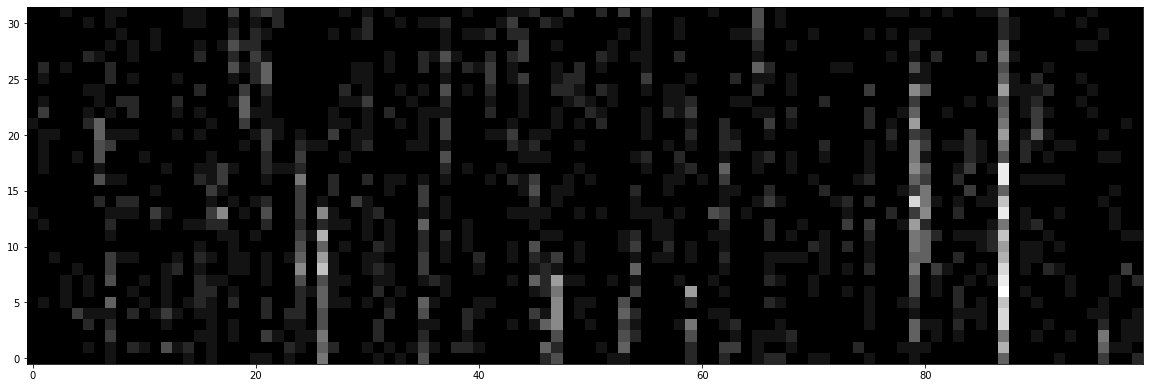

In [9]:
ax = plt.subplots(figsize=(20,8))
plt.imshow(np.transpose(stim_resp[:100, 100, :]), origin='lower', cmap='gray')

### Split into train test sets

In [10]:
len_units = np.shape(resp_mne)[1]

In [11]:
units_to_process = list(np.load('/mnt/cube/srrudrar/temporal_model/units_to_process.npy'))

In [12]:
exp_path = '/mnt/cube/srrudrar/tcm2/B1240/32x32/stim_resp_32x32_64/'

In [13]:
# obtain all preprocessed datas

%matplotlib inline
sdim = 64
n_jackknives = 4

test_output_path = os.path.join(exp_path, 'MNE_test_dset')
os.makedirs(test_output_path, exist_ok=True)
n_eigvec_to_display = 6 # Number of most positive and most negative eigenvectors to display

pfinals = {}
for unit in units_to_process:
    i = units_to_process.index(unit)
    stims_train, resps_train, stims_test, resps_test = MNE.prepare_MNE_train_test_set(stim_mne, resp_mne[:,i][:,np.newaxis], train_pct=0.8, zscore=True, kz_norm_resp=True)
    
    # Save test dataset
    test_dict = {'stims_test':stims_test, 'resps_test':resps_test}
    out_fname = 'unit-{}_MNE.pkl'.format(unit)
    out_f = os.path.join(test_output_path, out_fname)
    with open(out_f, 'wb') as f:
        pickle.dump(test_dict, f)

    # Run MNE
    pfinal = MNE.fit_MNE(stims_train, resps_train, order=2)
    #MNE.plot_MNE(pfinal, unit, figure_output_path)
    pfinals[unit] = pfinal

Iters   tally   ll(test) 
    1       0    0.162895
    2       0    0.161324
    3       0    0.157664
    4       0    0.155126
    5       0    0.158852
    6       1    0.161876
    7       2    0.158643
    8       3    0.157319
    9       4    0.156716
   10       5    0.154470
   11       0    0.153475
   12       0    0.154757
   13       1    0.154048
   14       2    0.155536
   15       3    0.155686
   16       4    0.154611
   17       5    0.155504
   18       6    0.155109
   19       7    0.155977
   20       8    0.155545
   21       9    0.154856
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146043
    2       0    0.142536
    3       0    0.144443
    4       1    0.143628
    5       2    0.146818
    6       3    0.142941
    7       4    0.144883
    8       5    0.142389
    9       0    0.142724
   10       1    0.143946
   11       2    0.141482
   12       0    0.140030
   13       0    0.141545
   14       1    0.141335
   15       

   22       8    0.087353
   23       9    0.087385
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.100631
    2       0    0.099046
    3       0    0.097928
    4       0    0.096950
    5       0    0.096482
    6       0    0.096331
    7       0    0.095987
    8       0    0.096344
    9       1    0.096055
   10       2    0.095765
   11       0    0.095619
   12       0    0.095745
   13       1    0.095573
   14       0    0.095170
   15       0    0.095090
   16       0    0.094990
   17       0    0.095005
   18       1    0.095191
   19       2    0.095117
   20       3    0.095151
   21       4    0.095740
   22       5    0.096181
   23       6    0.095810
   24       7    0.095877
   25       8    0.096023
   26       9    0.096114
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.101936
    2       0    0.098306
    3       0    0.098244
    4       0    0.097359
    5       0    0.095857
    6       0    0.095553
    7       

   21       0    0.088092
   22       1    0.088069
   23       2    0.088207
   24       3    0.088347
   25       4    0.088603
   26       5    0.088923
   27       6    0.089413
   28       7    0.089522
   29       8    0.089956
   30       9    0.089992
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.124388
    2       0    0.124054
    3       0    0.120163
    4       0    0.117808
    5       0    0.117745
    6       0    0.117267
    7       0    0.117475
    8       1    0.115263
    9       0    0.114493
   10       0    0.115232
   11       1    0.115689
   12       2    0.115475
   13       3    0.114820
   14       4    0.115011
   15       5    0.115515
   16       6    0.114687
   17       7    0.114704
   18       8    0.115236
   19       9    0.114844
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.124845
    2       0    0.120784
    3       0    0.123250
    4       1    0.121272
    5       2    0.118898
    6       

    8       0    0.292627
    9       1    0.293478
   10       2    0.292518
   11       3    0.290608
   12       0    0.290463
   13       0    0.290254
   14       0    0.290755
   15       1    0.290953
   16       2    0.290176
   17       0    0.290430
   18       1    0.291469
   19       2    0.291353
   20       3    0.291323
   21       4    0.291320
   22       5    0.291073
   23       6    0.290833
   24       7    0.290828
   25       8    0.290873
   26       9    0.291401
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.293586
    2       0    0.291865
    3       0    0.286861
    4       0    0.290722
    5       1    0.290055
    6       2    0.286154
    7       0    0.286512
    8       1    0.285361
    9       0    0.283708
   10       0    0.282852
   11       0    0.281657
   12       0    0.281898
   13       1    0.281617
   14       0    0.280604
   15       0    0.280155
   16       0    0.280555
   17       1    0.281059
   18       

    2       0    0.616719
    3       0    0.616133
    4       0    0.615548
    5       0    0.616299
    6       1    0.616073
    7       2    0.615436
    8       0    0.614713
    9       0    0.614527
   10       0    0.614527
   11       0    0.613937
   12       0    0.614010
   13       1    0.613915
   14       0    0.614264
   15       1    0.613993
   16       2    0.613498
   17       0    0.613514
   18       1    0.613735
   19       2    0.614380
   20       3    0.614288
   21       4    0.614990
   22       5    0.615086
   23       6    0.615613
   24       7    0.616768
   25       8    0.617147
   26       9    0.618492
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.619103
    2       0    0.616940
    3       0    0.615510
    4       0    0.616163
    5       1    0.614276
    6       0    0.613960
    7       0    0.612879
    8       0    0.612076
    9       0    0.612186
   10       1    0.612497
   11       2    0.611723
   12       

    9       2    0.317516
   10       0    0.317778
   11       1    0.318855
   12       2    0.318347
   13       3    0.317063
   14       0    0.317746
   15       1    0.317109
   16       2    0.317142
   17       3    0.316514
   18       0    0.317086
   19       1    0.317723
   20       2    0.317169
   21       3    0.317343
   22       4    0.317675
   23       5    0.317371
   24       6    0.317072
   25       7    0.317262
   26       8    0.317299
   27       9    0.317779
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.313907
    2       0    0.313434
    3       0    0.309518
    4       0    0.308497
    5       0    0.308474
    6       0    0.309497
    7       1    0.308816
    8       2    0.306333
    9       0    0.305568
   10       0    0.305055
   11       0    0.304796
   12       0    0.305962
   13       1    0.308651
   14       2    0.309488
   15       3    0.307807
   16       4    0.308889
   17       5    0.309413
   18       

   10       0    0.141836
   11       1    0.141822
   12       2    0.141280
   13       3    0.141111
   14       4    0.140630
   15       0    0.140768
   16       1    0.141127
   17       2    0.142634
   18       3    0.142890
   19       4    0.142412
   20       5    0.142245
   21       6    0.141726
   22       7    0.141691
   23       8    0.142196
   24       9    0.142452
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.070632
    2       0    0.067320
    3       0    0.067417
    4       1    0.075217
    5       2    0.086156
    6       3    0.086826
    7       4    0.086170
    8       5    0.086971
    9       6    0.087073
   10       7    0.086781
   11       8    0.087759
   12       9    0.089017
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.068642
    2       0    0.072660
    3       0    0.071089
    4       0    0.062773
    5       0    0.062250
    6       0    0.062381
    7       1    0.063464
    8       

   13       8    0.139724
   14       9    0.139164
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.160983
    2       0    0.156606
    3       0    0.155485
    4       0    0.157080
    5       1    0.156799
    6       2    0.153955
    7       0    0.153923
    8       0    0.154360
    9       1    0.154487
   10       2    0.156726
   11       3    0.157999
   12       4    0.157466
   13       5    0.157412
   14       6    0.157379
   15       7    0.157194
   16       8    0.156969
   17       9    0.156992
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.058763
    2       0    0.053500
    3       0    0.053038
    4       0    0.052703
    5       0    0.052237
    6       0    0.052255
    7       1    0.053045
    8       2    0.053002
    9       3    0.052413
   10       4    0.052326
   11       5    0.052010
   12       0    0.051773
   13       0    0.051767
   14       0    0.051547
   15       0    0.051509
   16       

   23       9    0.240940
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.239578
    2       0    0.238502
    3       0    0.236797
    4       0    0.236285
    5       0    0.236116
    6       0    0.236897
    7       1    0.235260
    8       0    0.234964
    9       0    0.234462
   10       0    0.234843
   11       1    0.235136
   12       2    0.236922
   13       3    0.236843
   14       4    0.236688
   15       5    0.236826
   16       6    0.236779
   17       7    0.236706
   18       8    0.236791
   19       9    0.237049
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.267080
    2       0    0.265033
    3       0    0.262660
    4       0    0.260101
    5       0    0.259958
    6       0    0.258822
    7       0    0.257841
    8       0    0.259907
    9       1    0.260787
   10       2    0.258199
   11       3    0.257197
   12       0    0.257551
   13       1    0.257482
   14       2    0.256795
   15       

    9       0    0.103808
   10       1    0.105445
   11       2    0.105259
   12       3    0.105452
   13       4    0.105461
   14       5    0.105010
   15       6    0.104514
   16       7    0.104512
   17       8    0.104373
   18       9    0.104354
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.128466
    2       0    0.125068
    3       0    0.124167
    4       0    0.122616
    5       0    0.123784
    6       1    0.125358
    7       2    0.126804
    8       3    0.128026
    9       4    0.127088
   10       5    0.127045
   11       6    0.126161
   12       7    0.125829
   13       8    0.125626
   14       9    0.125724
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.126441
    2       0    0.123847
    3       0    0.123697
    4       0    0.122702
    5       0    0.121147
    6       0    0.122277
    7       1    0.123526
    8       2    0.122033
    9       3    0.122375
   10       4    0.122526
   11       

    1       0    0.594004
    2       0    0.588661
    3       0    0.588892
    4       1    0.587269
    5       0    0.585750
    6       0    0.583419
    7       0    0.583675
    8       1    0.582780
    9       0    0.582303
   10       0    0.581781
   11       0    0.582119
   12       1    0.582692
   13       2    0.581932
   14       3    0.582180
   15       4    0.582668
   16       5    0.582833
   17       6    0.584941
   18       7    0.584914
   19       8    0.585035
   20       9    0.586163
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.201107
    2       0    0.199387
    3       0    0.198687
    4       0    0.197256
    5       0    0.196854
    6       0    0.196753
    7       0    0.196102
    8       0    0.197013
    9       1    0.197889
   10       2    0.196693
   11       3    0.196602
   12       4    0.196052
   13       0    0.195904
   14       0    0.195813
   15       0    0.195453
   16       0    0.195292
   17       

Iters   tally   ll(test) 
    1       0    0.158541
    2       0    0.156626
    3       0    0.151819
    4       0    0.150870
    5       0    0.150842
    6       0    0.150161
    7       0    0.149628
    8       0    0.148843
    9       0    0.148859
   10       1    0.148709
   11       0    0.147540
   12       0    0.147055
   13       0    0.147259
   14       1    0.147642
   15       2    0.148091
   16       3    0.147961
   17       4    0.147742
   18       5    0.147719
   19       6    0.147793
   20       7    0.147784
   21       8    0.148005
   22       9    0.148367
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.158134
    2       0    0.155152
    3       0    0.152510
    4       0    0.154233
    5       1    0.153646
    6       2    0.151681
    7       0    0.152341
    8       1    0.151945
    9       2    0.151175
   10       0    0.151512
   11       1    0.151523
   12       2    0.151167
   13       0    0.151638
   14       

   23       9    0.153759
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.163245
    2       0    0.160001
    3       0    0.158825
    4       0    0.157074
    5       0    0.155143
    6       0    0.154044
    7       0    0.153679
    8       0    0.152839
    9       0    0.152132
   10       0    0.151823
   11       0    0.151432
   12       0    0.151342
   13       0    0.150816
   14       0    0.151495
   15       1    0.151495
   16       2    0.151249
   17       3    0.151488
   18       4    0.151231
   19       5    0.151086
   20       6    0.151065
   21       7    0.150873
   22       8    0.150930
   23       9    0.151000
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.146290
    2       0    0.143259
    3       0    0.140882
    4       0    0.139003
    5       0    0.139075
    6       1    0.138444
    7       0    0.139335
    8       1    0.139309
    9       2    0.138365
   10       0    0.138597
   11       

   12       0    0.455028
   13       0    0.455063
   14       1    0.454644
   15       0    0.455131
   16       1    0.456521
   17       2    0.457495
   18       3    0.457591
   19       4    0.456544
   20       5    0.456659
   21       6    0.456464
   22       7    0.456403
   23       8    0.456265
   24       9    0.456237
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.470902
    2       0    0.468208
    3       0    0.463125
    4       0    0.460843
    5       0    0.459807
    6       0    0.456917
    7       0    0.456309
    8       0    0.455786
    9       0    0.457128
   10       1    0.458422
   11       2    0.457802
   12       3    0.457996
   13       4    0.457879
   14       5    0.457580
   15       6    0.457191
   16       7    0.456626
   17       8    0.456407
   18       9    0.456241
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.469506
    2       0    0.466819
    3       0    0.463951
    4       

Iters   tally   ll(test) 
    1       0    0.164523
    2       0    0.158885
    3       0    0.156688
    4       0    0.156702
    5       1    0.155878
    6       0    0.155951
    7       1    0.155852
    8       0    0.156002
    9       1    0.155331
   10       0    0.155215
   11       0    0.155960
   12       1    0.156307
   13       2    0.156210
   14       3    0.156364
   15       4    0.156732
   16       5    0.157065
   17       6    0.156965
   18       7    0.156483
   19       8    0.156428
   20       9    0.156611
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.529702
    2       0    0.525158
    3       0    0.521556
    4       0    0.518995
    5       0    0.517612
    6       0    0.516891
    7       0    0.515814
    8       0    0.515952
    9       1    0.515481
   10       0    0.514831
   11       0    0.514900
   12       1    0.514460
   13       0    0.514152
   14       0    0.514672
   15       1    0.516577
   16       

   28       7    0.129070
   29       8    0.128429
   30       9    0.128723
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.037775
    2       0    0.036889
    3       0    0.035116
    4       0    0.035023
    5       0    0.034421
    6       0    0.034343
    7       0    0.034927
    8       1    0.035277
    9       2    0.034524
   10       3    0.034472
   11       4    0.034434
   12       5    0.033649
   13       0    0.033176
   14       0    0.033609
   15       1    0.033830
   16       2    0.033954
   17       3    0.034070
   18       4    0.034602
   19       5    0.034737
   20       6    0.034768
   21       7    0.034646
   22       8    0.035284
   23       9    0.035288
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.051459
    2       0    0.047367
    3       0    0.048008
    4       1    0.049226
    5       2    0.047640
    6       3    0.047627
    7       4    0.047334
    8       0    0.046319
    9       

   12       1    0.323376
   13       2    0.323877
   14       3    0.323453
   15       4    0.324927
   16       5    0.327940
   17       6    0.328172
   18       7    0.328090
   19       8    0.328733
   20       9    0.328354
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.331560
    2       0    0.326740
    3       0    0.323254
    4       0    0.321555
    5       0    0.319408
    6       0    0.318208
    7       0    0.318072
    8       0    0.318166
    9       1    0.317264
   10       0    0.316761
   11       0    0.315959
   12       0    0.315836
   13       0    0.315578
   14       0    0.315294
   15       0    0.315363
   16       1    0.315460
   17       2    0.316211
   18       3    0.316181
   19       4    0.316515
   20       5    0.316639
   21       6    0.316491
   22       7    0.316512
   23       8    0.316698
   24       9    0.316793
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.332250
    2       

   17       8    0.666335
   18       9    0.666214
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.670617
    2       0    0.668195
    3       0    0.667078
    4       0    0.667350
    5       1    0.667755
    6       2    0.666416
    7       0    0.665618
    8       0    0.664470
    9       0    0.664508
   10       1    0.664172
   11       0    0.665281
   12       1    0.666811
   13       2    0.668843
   14       3    0.667957
   15       4    0.671050
   16       5    0.671834
   17       6    0.672298
   18       7    0.673261
   19       8    0.673861
   20       9    0.674214
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.165166
    2       0    0.165301
    3       0    0.165790
    4       1    0.163354
    5       0    0.162341
    6       0    0.160600
    7       0    0.160399
    8       0    0.161352
    9       1    0.160622
   10       2    0.162202
   11       3    0.162006
   12       4    0.161671
   13       

    1       0    0.229512
    2       0    0.226346
    3       0    0.222931
    4       0    0.221836
    5       0    0.220136
    6       0    0.220535
    7       1    0.219824
    8       0    0.220578
    9       1    0.221661
   10       2    0.220908
   11       3    0.220051
   12       4    0.219477
   13       0    0.219074
   14       0    0.219209
   15       1    0.219432
   16       2    0.219008
   17       0    0.219729
   18       1    0.221588
   19       2    0.222545
   20       3    0.223120
   21       4    0.223290
   22       5    0.223434
   23       6    0.224299
   24       7    0.225325
   25       8    0.225750
   26       9    0.226533
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.218926
    2       0    0.214405
    3       0    0.216007
    4       1    0.215239
    5       2    0.209170
    6       0    0.207233
    7       0    0.206972
    8       0    0.206527
    9       0    0.210789
   10       1    0.209092
   11       

    2       0    0.539033
    3       0    0.538024
    4       0    0.537519
    5       0    0.535458
    6       0    0.535239
    7       0    0.534997
    8       0    0.534750
    9       0    0.534744
   10       0    0.534661
   11       0    0.534770
   12       1    0.534636
   13       0    0.534772
   14       1    0.535103
   15       2    0.536157
   16       3    0.537930
   17       4    0.538602
   18       5    0.539015
   19       6    0.539380
   20       7    0.539805
   21       8    0.540875
   22       9    0.541636
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.660309
    2       0    0.656180
    3       0    0.655697
    4       0    0.654959
    5       0    0.654367
    6       0    0.653673
    7       0    0.652832
    8       0    0.652350
    9       0    0.652374
   10       1    0.651922
   11       0    0.651879
   12       0    0.652096
   13       1    0.652404
   14       2    0.652744
   15       3    0.653392
   16       

   20       1    0.545248
   21       0    0.545570
   22       1    0.545775
   23       2    0.546602
   24       3    0.547551
   25       4    0.547977
   26       5    0.549390
   27       6    0.549919
   28       7    0.550146
   29       8    0.550211
   30       9    0.550391
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.576714
    2       0    0.579296
    3       0    0.562017
    4       0    0.560567
    5       0    0.558276
    6       0    0.556741
    7       0    0.556728
    8       0    0.557062
    9       1    0.557940
   10       2    0.558175
   11       3    0.556725
   12       0    0.556086
   13       0    0.556026
   14       0    0.557506
   15       1    0.559448
   16       2    0.563540
   17       3    0.561428
   18       4    0.560363
   19       5    0.559885
   20       6    0.559507
   21       7    0.559782
   22       8    0.560073
   23       9    0.560218
minimum of test set found
Iters   tally   ll(test) 
    1       

    3       0    0.278577
    4       0    0.272864
    5       0    0.271280
    6       0    0.270874
    7       0    0.271689
    8       1    0.271023
    9       2    0.270626
   10       0    0.271887
   11       1    0.270667
   12       2    0.269990
   13       0    0.271106
   14       1    0.271296
   15       2    0.273263
   16       3    0.272850
   17       4    0.272251
   18       5    0.273563
   19       6    0.274023
   20       7    0.273458
   21       8    0.273828
   22       9    0.273589
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.265861
    2       0    0.265394
    3       0    0.267027
    4       1    0.263377
    5       0    0.262249
    6       0    0.261161
    7       0    0.260811
    8       0    0.259905
    9       0    0.259811
   10       0    0.260834
   11       1    0.259639
   12       0    0.259474
   13       0    0.259554
   14       1    0.258875
   15       0    0.258885
   16       1    0.259266
   17       

   18       8    0.313147
   19       9    0.313601
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.482434
    2       0    0.477506
    3       0    0.474524
    4       0    0.473489
    5       0    0.471643
    6       0    0.471201
    7       0    0.470188
    8       0    0.469578
    9       0    0.469838
   10       1    0.469127
   11       0    0.468715
   12       0    0.469257
   13       1    0.470354
   14       2    0.469777
   15       3    0.469431
   16       4    0.469325
   17       5    0.468969
   18       6    0.468596
   19       0    0.468717
   20       1    0.468831
   21       2    0.468942
   22       3    0.468806
   23       4    0.469020
   24       5    0.469732
   25       6    0.469638
   26       7    0.469899
   27       8    0.470012
   28       9    0.469818
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.488526
    2       0    0.480335
    3       0    0.479825
    4       0    0.479891
    5       

    6       0    0.197392
    7       1    0.195909
    8       0    0.195504
    9       0    0.194369
   10       0    0.193562
   11       0    0.192503
   12       0    0.192467
   13       0    0.192050
   14       0    0.191961
   15       0    0.192287
   16       1    0.192353
   17       2    0.191981
   18       3    0.192206
   19       4    0.192238
   20       5    0.192278
   21       6    0.192065
   22       7    0.192290
   23       8    0.192446
   24       9    0.192423
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.201071
    2       0    0.203315
    3       0    0.202677
    4       0    0.197886
    5       0    0.198947
    6       1    0.196621
    7       0    0.196239
    8       0    0.196177
    9       0    0.194786
   10       0    0.195017
   11       1    0.195434
   12       2    0.194147
   13       0    0.193439
   14       0    0.192887
   15       0    0.194007
   16       1    0.193962
   17       2    0.193637
   18       

   14       3    0.299267
   15       4    0.299647
   16       5    0.299630
   17       6    0.299326
   18       7    0.299307
   19       8    0.299021
   20       9    0.298846
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.299884
    2       0    0.295821
    3       0    0.294253
    4       0    0.291806
    5       0    0.285925
    6       0    0.284640
    7       0    0.284989
    8       1    0.284513
    9       0    0.284999
   10       1    0.284940
   11       2    0.286696
   12       3    0.288350
   13       4    0.289707
   14       5    0.290067
   15       6    0.290906
   16       7    0.290572
   17       8    0.289842
   18       9    0.288301
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.239384
    2       0    0.238806
    3       0    0.238035
    4       0    0.237681
    5       0    0.237834
    6       1    0.238010
    7       2    0.237417
    8       0    0.237098
    9       0    0.236908
   10       

   11       4    0.072669
   12       5    0.072588
   13       6    0.072650
   14       7    0.073625
   15       8    0.075305
   16       9    0.075497
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.087399
    2       0    0.085851
    3       0    0.085003
    4       0    0.085268
    5       1    0.085429
    6       2    0.085182
    7       3    0.085184
    8       4    0.085277
    9       5    0.085878
   10       6    0.086415
   11       7    0.086239
   12       8    0.086305
   13       9    0.086733
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.089351
    2       0    0.090788
    3       0    0.092695
    4       1    0.093403
    5       2    0.091507
    6       3    0.089769
    7       0    0.089033
    8       0    0.088687
    9       0    0.088950
   10       1    0.088745
   11       2    0.089005
   12       3    0.090415
   13       4    0.091127
   14       5    0.092640
   15       6    0.093007
   16       

   10       1    0.207610
   11       2    0.207389
   12       0    0.207517
   13       1    0.207900
   14       2    0.208745
   15       3    0.208784
   16       4    0.208756
   17       5    0.208988
   18       6    0.209044
   19       7    0.208964
   20       8    0.209143
   21       9    0.209217
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.194034
    2       0    0.192259
    3       0    0.190587
    4       0    0.190360
    5       0    0.190669
    6       1    0.189775
    7       0    0.189479
    8       0    0.189092
    9       0    0.189171
   10       1    0.189248
   11       2    0.188694
   12       0    0.188739
   13       1    0.188854
   14       2    0.189101
   15       3    0.188858
   16       4    0.189316
   17       5    0.190024
   18       6    0.190496
   19       7    0.190997
   20       8    0.191440
   21       9    0.192113
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.211751
    2       

   23       7    0.176957
   24       8    0.177564
   25       9    0.178168
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.176789
    2       0    0.174007
    3       0    0.172902
    4       0    0.170164
    5       0    0.169906
    6       0    0.168801
    7       0    0.167487
    8       0    0.167309
    9       0    0.167513
   10       1    0.167844
   11       2    0.168023
   12       3    0.167711
   13       4    0.167521
   14       5    0.167148
   15       0    0.167089
   16       0    0.167108
   17       1    0.166885
   18       0    0.166666
   19       0    0.166840
   20       1    0.167670
   21       2    0.167942
   22       3    0.167651
   23       4    0.167458
   24       5    0.167900
   25       6    0.168097
   26       7    0.168301
   27       8    0.168430
   28       9    0.168479
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.085162
    2       0    0.083545
    3       0    0.083661
    4       

   13       7    0.108480
   14       8    0.109347
   15       9    0.109258
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.281365
    2       0    0.276157
    3       0    0.274369
    4       0    0.275227
    5       1    0.276470
    6       2    0.274586
    7       3    0.272502
    8       0    0.271957
    9       0    0.271831
   10       0    0.272030
   11       1    0.272298
   12       2    0.271597
   13       0    0.270769
   14       0    0.270873
   15       1    0.271365
   16       2    0.272748
   17       3    0.272294
   18       4    0.273644
   19       5    0.274685
   20       6    0.273882
   21       7    0.273225
   22       8    0.273151
   23       9    0.273109
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.274364
    2       0    0.270976
    3       0    0.271042
    4       1    0.267403
    5       0    0.267160
    6       0    0.266862
    7       0    0.264753
    8       0    0.264180
    9       

    1       0    0.303000
    2       0    0.309432
    3       0    0.310751
    4       1    0.304939
    5       0    0.302947
    6       0    0.301708
    7       0    0.299649
    8       0    0.299656
    9       1    0.299636
   10       0    0.298690
   11       0    0.299890
   12       1    0.300302
   13       2    0.300854
   14       3    0.302184
   15       4    0.302570
   16       5    0.303603
   17       6    0.303496
   18       7    0.302882
   19       8    0.303098
   20       9    0.302983
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.310066
    2       0    0.308746
    3       0    0.304965
    4       0    0.303019
    5       0    0.302826
    6       0    0.299482
    7       0    0.299453
    8       0    0.299211
    9       0    0.298431
   10       0    0.297713
   11       0    0.298127
   12       1    0.298033
   13       2    0.297850
   14       3    0.297452
   15       0    0.297824
   16       1    0.298544
   17       

   19       8    0.440597
   20       9    0.441116
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.441061
    2       0    0.440750
    3       0    0.440354
    4       0    0.437620
    5       0    0.436476
    6       0    0.435886
    7       0    0.434867
    8       0    0.434317
    9       0    0.434870
   10       1    0.435111
   11       2    0.434136
   12       0    0.434186
   13       1    0.434371
   14       2    0.434068
   15       0    0.435011
   16       1    0.436804
   17       2    0.437431
   18       3    0.439617
   19       4    0.440187
   20       5    0.440207
   21       6    0.440666
   22       7    0.440509
   23       8    0.440005
   24       9    0.439636
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.594244
    2       0    0.588192
    3       0    0.586360
    4       0    0.585962
    5       0    0.584968
    6       0    0.585443
    7       1    0.585302
    8       2    0.583950
    9       

   19       7    0.049469
   20       8    0.049249
   21       9    0.049200
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.055706
    2       0    0.055052
    3       0    0.054777
    4       0    0.053861
    5       0    0.053257
    6       0    0.052941
    7       0    0.052658
    8       0    0.052459
    9       0    0.051315
   10       0    0.050613
   11       0    0.050710
   12       1    0.050727
   13       2    0.050537
   14       0    0.050464
   15       0    0.050488
   16       1    0.050567
   17       2    0.050618
   18       3    0.050576
   19       4    0.050615
   20       5    0.050613
   21       6    0.050203
   22       0    0.050127
   23       0    0.050360
   24       1    0.050354
   25       2    0.050306
   26       3    0.050263
   27       4    0.050291
   28       5    0.050435
   29       6    0.050437
   30       7    0.050384
   31       8    0.050405
   32       9    0.050558
minimum of test set found
Iters   tall

    4       0    0.208079
    5       0    0.206490
    6       0    0.205623
    7       0    0.206083
    8       1    0.205737
    9       2    0.205857
   10       3    0.206166
   11       4    0.205483
   12       0    0.205526
   13       1    0.205312
   14       0    0.204887
   15       0    0.204782
   16       0    0.204479
   17       0    0.205357
   18       1    0.206247
   19       2    0.206098
   20       3    0.206407
   21       4    0.207767
   22       5    0.209198
   23       6    0.210087
   24       7    0.209478
   25       8    0.209127
   26       9    0.208674
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.213787
    2       0    0.210991
    3       0    0.207181
    4       0    0.206353
    5       0    0.205479
    6       0    0.205369
    7       0    0.204152
    8       0    0.203007
    9       0    0.202690
   10       0    0.202550
   11       0    0.202038
   12       0    0.202004
   13       0    0.202551
   14       

   28       6    0.501767
   29       7    0.501887
   30       8    0.502080
   31       9    0.502133
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.522759
    2       0    0.519709
    3       0    0.499139
    4       0    0.496185
    5       0    0.494251
    6       0    0.493163
    7       0    0.491945
    8       0    0.492904
    9       1    0.493527
   10       2    0.493465
   11       3    0.492960
   12       4    0.493365
   13       5    0.492656
   14       6    0.492863
   15       7    0.492514
   16       8    0.492547
   17       9    0.492979
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.519801
    2       0    0.515603
    3       0    0.514146
    4       0    0.510082
    5       0    0.507315
    6       0    0.506271
    7       0    0.505050
    8       0    0.504402
    9       0    0.503397
   10       0    0.503528
   11       1    0.504670
   12       2    0.504939
   13       3    0.505315
   14       

    2       0    0.131193
    3       0    0.130526
    4       0    0.130952
    5       1    0.129638
    6       0    0.130090
    7       1    0.129122
    8       0    0.131496
    9       1    0.131970
   10       2    0.129845
   11       3    0.130435
   12       4    0.130305
   13       5    0.131567
   14       6    0.130886
   15       7    0.132675
   16       8    0.132550
   17       9    0.133075
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.135172
    2       0    0.134155
    3       0    0.133740
    4       0    0.131518
    5       0    0.130041
    6       0    0.129603
    7       0    0.129837
    8       1    0.129659
    9       2    0.129717
   10       3    0.129669
   11       4    0.129740
   12       5    0.130507
   13       6    0.131275
   14       7    0.130397
   15       8    0.129912
   16       9    0.129595
   17       0    0.129669
   18       1    0.130373
   19       2    0.131221
   20       3    0.130434
   21       

   10       0    0.640950
   11       0    0.640836
   12       0    0.640765
   13       0    0.641496
   14       1    0.641623
   15       2    0.641920
   16       3    0.642692
   17       4    0.643083
   18       5    0.644304
   19       6    0.645755
   20       7    0.646717
   21       8    0.649050
   22       9    0.651659
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.082443
    2       0    0.082217
    3       0    0.080977
    4       0    0.081408
    5       1    0.084112
    6       2    0.084824
    7       3    0.083194
    8       4    0.082772
    9       5    0.083584
   10       6    0.084766
   11       7    0.084832
   12       8    0.083602
   13       9    0.083537
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.079936
    2       0    0.079258
    3       0    0.078839
    4       0    0.078138
    5       0    0.077981
    6       0    0.078339
    7       1    0.078564
    8       2    0.079248
    9       

    3       0    0.222991
    4       0    0.220174
    5       0    0.218839
    6       0    0.217964
    7       0    0.218383
    8       1    0.218013
    9       2    0.216942
   10       0    0.216886
   11       0    0.217075
   12       1    0.216491
   13       0    0.216465
   14       0    0.215871
   15       0    0.216316
   16       1    0.216600
   17       2    0.215533
   18       0    0.215783
   19       1    0.216203
   20       2    0.217090
   21       3    0.216987
   22       4    0.218152
   23       5    0.218451
   24       6    0.219978
   25       7    0.220472
   26       8    0.219873
   27       9    0.220410
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.238630
    2       0    0.238720
    3       0    0.238773
    4       1    0.237898
    5       0    0.237466
    6       0    0.237607
    7       1    0.237696
    8       2    0.238267
    9       3    0.239451
   10       4    0.240682
   11       5    0.243492
   12       

    1       0    0.160362
    2       0    0.159870
    3       0    0.155147
    4       0    0.152356
    5       0    0.150480
    6       0    0.149940
    7       0    0.149816
    8       0    0.149895
    9       1    0.151133
   10       2    0.151161
   11       3    0.150967
   12       4    0.150680
   13       5    0.151792
   14       6    0.154271
   15       7    0.155537
   16       8    0.157781
   17       9    0.159396
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.153440
    2       0    0.150239
    3       0    0.149435
    4       0    0.149053
    5       0    0.148500
    6       0    0.149158
    7       1    0.149651
    8       2    0.149476
    9       3    0.148742
   10       4    0.148948
   11       5    0.148676
   12       6    0.148749
   13       7    0.149957
   14       8    0.151300
   15       9    0.150833
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.589792
    2       0    0.587941
    3       

   11       2    0.208573
   12       3    0.208521
   13       4    0.208798
   14       5    0.208773
   15       6    0.208427
   16       7    0.208630
   17       8    0.209226
   18       9    0.210609
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.167839
    2       0    0.167561
    3       0    0.165832
    4       0    0.164553
    5       0    0.163535
    6       0    0.163382
    7       0    0.163485
    8       1    0.163004
    9       0    0.162750
   10       0    0.162737
   11       0    0.163165
   12       1    0.163603
   13       2    0.162757
   14       3    0.162902
   15       4    0.162978
   16       5    0.163009
   17       6    0.162918
   18       7    0.163380
   19       8    0.163576
   20       9    0.163353
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.187561
    2       0    0.182378
    3       0    0.178991
    4       0    0.177863
    5       0    0.176143
    6       0    0.175985
    7       

   13       3    0.263974
   14       4    0.266194
   15       5    0.266947
   16       6    0.267696
   17       7    0.267618
   18       8    0.268207
   19       9    0.267599
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.254746
    2       0    0.251791
    3       0    0.251523
    4       0    0.250895
    5       0    0.251331
    6       1    0.250666
    7       0    0.250202
    8       0    0.248925
    9       0    0.248870
   10       0    0.249016
   11       1    0.249272
   12       2    0.249632
   13       3    0.249254
   14       4    0.249086
   15       5    0.250012
   16       6    0.251455
   17       7    0.251859
   18       8    0.251876
   19       9    0.252201
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.277471
    2       0    0.275003
    3       0    0.275508
    4       1    0.273938
    5       0    0.273876
    6       0    0.272683
    7       0    0.273502
    8       1    0.273429
    9       

   17       2    0.241502
   18       3    0.241246
   19       0    0.240705
   20       0    0.240734
   21       1    0.240666
   22       0    0.240507
   23       0    0.240594
   24       1    0.240638
   25       2    0.240737
   26       3    0.240947
   27       4    0.241475
   28       5    0.241927
   29       6    0.241682
   30       7    0.241755
   31       8    0.241662
   32       9    0.241366
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.269790
    2       0    0.265873
    3       0    0.262419
    4       0    0.262669
    5       1    0.261173
    6       0    0.259595
    7       0    0.262194
    8       1    0.259588
    9       0    0.259811
   10       1    0.262015
   11       2    0.260843
   12       3    0.259711
   13       4    0.260424
   14       5    0.260042
   15       6    0.259410
   16       0    0.259006
   17       0    0.260016
   18       1    0.260810
   19       2    0.261282
   20       3    0.260921
   21       

   20       6    0.295136
   21       7    0.296096
   22       8    0.295821
   23       9    0.296004
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.217566
    2       0    0.218169
    3       0    0.218318
    4       1    0.214460
    5       0    0.213571
    6       0    0.211530
    7       0    0.211805
    8       1    0.211670
    9       2    0.210876
   10       0    0.211127
   11       1    0.211407
   12       2    0.211122
   13       3    0.210832
   14       0    0.211948
   15       1    0.212487
   16       2    0.213412
   17       3    0.214827
   18       4    0.215107
   19       5    0.214989
   20       6    0.215240
   21       7    0.215213
   22       8    0.215898
   23       9    0.216226
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.225448
    2       0    0.227646
    3       0    0.226163
    4       0    0.222940
    5       0    0.223428
    6       1    0.222088
    7       0    0.221992
    8       

    5       0    0.298126
    6       0    0.296124
    7       0    0.296589
    8       1    0.298254
    9       2    0.298529
   10       3    0.296835
   11       4    0.296484
   12       5    0.295916
   13       0    0.296175
   14       1    0.297030
   15       2    0.297104
   16       3    0.296156
   17       4    0.295947
   18       5    0.297388
   19       6    0.297752
   20       7    0.298021
   21       8    0.298846
   22       9    0.299736
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.304669
    2       0    0.302220
    3       0    0.299503
    4       0    0.300590
    5       1    0.301543
    6       2    0.299345
    7       0    0.299119
    8       0    0.298216
    9       0    0.298806
   10       1    0.298707
   11       2    0.298007
   12       0    0.298259
   13       1    0.298449
   14       2    0.297887
   15       0    0.298631
   16       1    0.299172
   17       2    0.299899
   18       3    0.301390
   19       

    8       0    0.271376
    9       0    0.272746
   10       1    0.272594
   11       2    0.271795
   12       3    0.270383
   13       0    0.271234
   14       1    0.270781
   15       2    0.274001
   16       3    0.274166
   17       4    0.271310
   18       5    0.271990
   19       6    0.272649
   20       7    0.271865
   21       8    0.272082
   22       9    0.272675
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.160332
    2       0    0.158356
    3       0    0.160321
    4       1    0.160390
    5       2    0.159189
    6       3    0.159218
    7       4    0.158190
    8       0    0.157597
    9       0    0.157613
   10       1    0.157638
   11       2    0.157639
   12       3    0.158241
   13       4    0.158344
   14       5    0.160344
   15       6    0.161623
   16       7    0.162568
   17       8    0.163210
   18       9    0.162950
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.176569
    2       

    2       0    0.178819
    3       0    0.177020
    4       0    0.176519
    5       0    0.176281
    6       0    0.175913
    7       0    0.175679
    8       0    0.175936
    9       1    0.176551
   10       2    0.176487
   11       3    0.176368
   12       4    0.176243
   13       5    0.176313
   14       6    0.176745
   15       7    0.177818
   16       8    0.178905
   17       9    0.180533
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.178868
    2       0    0.179568
    3       0    0.178412
    4       0    0.178201
    5       0    0.178069
    6       0    0.176668
    7       0    0.176107
    8       0    0.175974
    9       0    0.175409
   10       0    0.175339
   11       0    0.175289
   12       0    0.175186
   13       0    0.175635
   14       1    0.176296
   15       2    0.176607
   16       3    0.177247
   17       4    0.177234
   18       5    0.177202
   19       6    0.177059
   20       7    0.177156
   21       

    3       0    0.193105
    4       0    0.188852
    5       0    0.186996
    6       0    0.185386
    7       0    0.184244
    8       0    0.183369
    9       0    0.183335
   10       0    0.183729
   11       1    0.183980
   12       2    0.183341
   13       3    0.182458
   14       0    0.182421
   15       0    0.182892
   16       1    0.183766
   17       2    0.184373
   18       3    0.184603
   19       4    0.184149
   20       5    0.184050
   21       6    0.183582
   22       7    0.183777
   23       8    0.183790
   24       9    0.183661
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.205088
    2       0    0.196581
    3       0    0.192493
    4       0    0.187834
    5       0    0.187124
    6       0    0.184969
    7       0    0.183324
    8       0    0.182716
    9       0    0.183005
   10       1    0.185312
   11       2    0.185110
   12       3    0.185540
   13       4    0.187458
   14       5    0.188237
   15       

    7       1    0.429047
    8       2    0.432273
    9       3    0.430747
   10       4    0.431578
   11       5    0.431049
   12       6    0.430990
   13       7    0.431045
   14       8    0.430473
   15       9    0.429954
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.434220
    2       0    0.431893
    3       0    0.426799
    4       0    0.425558
    5       0    0.424724
    6       0    0.424603
    7       0    0.421166
    8       0    0.421079
    9       0    0.422400
   10       1    0.423295
   11       2    0.422049
   12       3    0.421375
   13       4    0.421609
   14       5    0.421015
   15       0    0.422074
   16       1    0.426998
   17       2    0.428464
   18       3    0.430422
   19       4    0.430600
   20       5    0.429754
   21       6    0.430022
   22       7    0.430539
   23       8    0.429912
   24       9    0.430239
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.433294
    2       

   12       0    0.202147
   13       0    0.202921
   14       1    0.206379
   15       2    0.216475
   16       3    0.220135
   17       4    0.218374
   18       5    0.218385
   19       6    0.218247
   20       7    0.218429
   21       8    0.218382
   22       9    0.218164
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.209544
    2       0    0.205145
    3       0    0.204202
    4       0    0.202418
    5       0    0.200376
    6       0    0.199638
    7       0    0.199191
    8       0    0.199596
    9       1    0.198503
   10       0    0.199681
   11       1    0.199579
   12       2    0.197347
   13       0    0.197461
   14       1    0.198225
   15       2    0.198197
   16       3    0.197384
   17       4    0.197002
   18       0    0.198003
   19       1    0.200218
   20       2    0.200170
   21       3    0.198824
   22       4    0.199043
   23       5    0.198826
   24       6    0.199040
   25       7    0.199611
   26       

    7       0    0.110717
    8       0    0.110472
    9       0    0.109890
   10       0    0.110014
   11       1    0.110056
   12       2    0.109483
   13       0    0.109526
   14       1    0.109236
   15       0    0.109554
   16       1    0.110074
   17       2    0.110039
   18       3    0.109395
   19       4    0.109572
   20       5    0.110360
   21       6    0.110676
   22       7    0.111486
   23       8    0.111843
   24       9    0.112179
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.117800
    2       0    0.113396
    3       0    0.109421
    4       0    0.109247
    5       0    0.108667
    6       0    0.107658
    7       0    0.107280
    8       0    0.108101
    9       1    0.107693
   10       2    0.106745
   11       0    0.106529
   12       0    0.106465
   13       0    0.107031
   14       1    0.107906
   15       2    0.107450
   16       3    0.107136
   17       4    0.107060
   18       5    0.107278
   19       

   17       8    0.087979
   18       9    0.088001
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091086
    2       0    0.091187
    3       0    0.089958
    4       0    0.091030
    5       1    0.092488
    6       2    0.091457
    7       3    0.091080
    8       4    0.090659
    9       5    0.090730
   10       6    0.090722
   11       7    0.090476
   12       8    0.090239
   13       9    0.090325
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.091617
    2       0    0.089794
    3       0    0.090341
    4       1    0.090143
    5       2    0.090187
    6       3    0.090358
    7       4    0.090030
    8       5    0.090550
    9       6    0.090309
   10       7    0.090394
   11       8    0.090437
   12       9    0.090419
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.305375
    2       0    0.298616
    3       0    0.296348
    4       0    0.292544
    5       0    0.289153
    6       

    3       0    0.130938
    4       0    0.134846
    5       1    0.137440
    6       2    0.131174
    7       3    0.131659
    8       4    0.131002
    9       5    0.128778
   10       0    0.129057
   11       1    0.129147
   12       2    0.129132
   13       3    0.128328
   14       0    0.129273
   15       1    0.131763
   16       2    0.132750
   17       3    0.132288
   18       4    0.133648
   19       5    0.136166
   20       6    0.135925
   21       7    0.136430
   22       8    0.139303
   23       9    0.141105
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.139342
    2       0    0.136099
    3       0    0.132674
    4       0    0.133067
    5       1    0.134329
    6       2    0.134027
    7       3    0.134666
    8       4    0.133864
    9       5    0.135556
   10       6    0.137199
   11       7    0.137392
   12       8    0.138248
   13       9    0.138556
minimum of test set found
Iters   tally   ll(test) 
    1       

   15       7    0.102159
   16       8    0.102420
   17       9    0.102054
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111820
    2       0    0.109209
    3       0    0.108431
    4       0    0.107521
    5       0    0.106657
    6       0    0.105338
    7       0    0.105118
    8       0    0.104593
    9       0    0.104369
   10       0    0.104635
   11       1    0.104147
   12       0    0.104012
   13       0    0.103725
   14       0    0.103730
   15       1    0.103757
   16       2    0.103800
   17       3    0.103638
   18       0    0.103553
   19       0    0.103614
   20       1    0.103603
   21       2    0.103643
   22       3    0.103750
   23       4    0.103973
   24       5    0.104944
   25       6    0.104555
   26       7    0.104678
   27       8    0.104943
   28       9    0.105025
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.111577
    2       0    0.107586
    3       0    0.105606
    4       

   13       0    0.210867
   14       1    0.212924
   15       2    0.212924
   16       3    0.213568
   17       4    0.213408
   18       5    0.213526
   19       6    0.215293
   20       7    0.215937
   21       8    0.216455
   22       9    0.217191
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.211575
    2       0    0.213023
    3       0    0.214489
    4       1    0.212181
    5       0    0.213921
    6       1    0.212852
    7       2    0.211750
    8       0    0.213158
    9       1    0.212337
   10       2    0.210641
   11       0    0.211265
   12       1    0.211420
   13       2    0.212117
   14       3    0.214974
   15       4    0.215092
   16       5    0.215472
   17       6    0.215541
   18       7    0.217435
   19       8    0.218869
   20       9    0.218738
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.208114
    2       0    0.210513
    3       0    0.206196
    4       0    0.203469
    5       

    2       0    0.562121
    3       0    0.559195
    4       0    0.559440
    5       1    0.558516
    6       0    0.559089
    7       1    0.559052
    8       2    0.557782
    9       0    0.557962
   10       1    0.558101
   11       2    0.556838
   12       0    0.556269
   13       0    0.556557
   14       1    0.556261
   15       0    0.556454
   16       1    0.556624
   17       2    0.556354
   18       3    0.558113
   19       4    0.560025
   20       5    0.560440
   21       6    0.560927
   22       7    0.561718
   23       8    0.561685
   24       9    0.561980
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.289435
    2       0    0.282073
    3       0    0.278472
    4       0    0.278058
    5       0    0.276143
    6       0    0.274665
    7       0    0.274267
    8       0    0.274748
    9       1    0.274046
   10       0    0.274236
   11       1    0.273422
   12       0    0.273689
   13       1    0.273509
   14       

    2       0    0.026276
    3       0    0.027231
    4       1    0.026308
    5       2    0.025724
    6       0    0.025581
    7       0    0.024583
    8       0    0.024403
    9       0    0.024219
   10       0    0.024373
   11       1    0.024282
   12       2    0.024277
   13       3    0.024320
   14       4    0.024211
   15       0    0.024203
   16       0    0.024130
   17       0    0.024197
   18       1    0.024093
   19       0    0.024097
   20       1    0.023969
   21       0    0.023953
   22       0    0.023897
   23       0    0.023991
   24       1    0.023933
   25       2    0.024013
   26       3    0.024056
   27       4    0.024030
   28       5    0.024084
   29       6    0.024024
   30       7    0.023890
   31       0    0.023961
   32       1    0.024036
   33       2    0.024012
   34       3    0.024151
   35       4    0.024270
   36       5    0.024985
   37       6    0.025416
   38       7    0.026166
   39       8    0.026595
   40       

   36       8    0.160756
   37       9    0.160984
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.180530
    2       0    0.177515
    3       0    0.176285
    4       0    0.175196
    5       0    0.173017
    6       0    0.172538
    7       0    0.172438
    8       0    0.171780
    9       0    0.170829
   10       0    0.169899
   11       0    0.170072
   12       1    0.169555
   13       0    0.169831
   14       1    0.169404
   15       0    0.170344
   16       1    0.170278
   17       2    0.169544
   18       3    0.169682
   19       4    0.169251
   20       0    0.169416
   21       1    0.168952
   22       0    0.169247
   23       1    0.169433
   24       2    0.170691
   25       3    0.171155
   26       4    0.169880
   27       5    0.169608
   28       6    0.169485
   29       7    0.169732
   30       8    0.169458
   31       9    0.169626
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.171322
    2       

   13       3    0.249489
   14       4    0.250743
   15       5    0.251284
   16       6    0.252130
   17       7    0.251823
   18       8    0.252110
   19       9    0.252074
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.266507
    2       0    0.262865
    3       0    0.260499
    4       0    0.260977
    5       1    0.258153
    6       0    0.257906
    7       0    0.257594
    8       0    0.257438
    9       0    0.258220
   10       1    0.258464
   11       2    0.258172
   12       3    0.258367
   13       4    0.259261
   14       5    0.259467
   15       6    0.258672
   16       7    0.258318
   17       8    0.258285
   18       9    0.258358
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.182634
    2       0    0.173662
    3       0    0.173175
    4       0    0.173820
    5       1    0.169617
    6       0    0.168226
    7       0    0.167058
    8       0    0.166821
    9       0    0.167311
   10       

   15       4    0.142474
   16       5    0.142528
   17       6    0.141683
   18       7    0.141711
   19       8    0.141742
   20       9    0.141393
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.139815
    2       0    0.138975
    3       0    0.138771
    4       0    0.138592
    5       0    0.138838
    6       1    0.138413
    7       0    0.138207
    8       0    0.138256
    9       1    0.138497
   10       2    0.138854
   11       3    0.138692
   12       4    0.139343
   13       5    0.139703
   14       6    0.140345
   15       7    0.140116
   16       8    0.140427
   17       9    0.140722
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.140404
    2       0    0.138018
    3       0    0.137074
    4       0    0.137891
    5       1    0.138753
    6       2    0.137516
    7       3    0.136764
    8       0    0.136475
    9       0    0.136350
   10       0    0.136813
   11       1    0.136555
   12       

    2       0    0.236676
    3       0    0.233368
    4       0    0.232942
    5       0    0.230158
    6       0    0.228307
    7       0    0.227222
    8       0    0.227244
    9       1    0.226766
   10       0    0.226495
   11       0    0.226225
   12       0    0.226748
   13       1    0.226604
   14       2    0.226426
   15       3    0.228337
   16       4    0.231828
   17       5    0.234604
   18       6    0.233343
   19       7    0.232185
   20       8    0.232880
   21       9    0.233510
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.195503
    2       0    0.193517
    3       0    0.192149
    4       0    0.192631
    5       1    0.192601
    6       2    0.192157
    7       3    0.190808
    8       0    0.189877
    9       0    0.189465
   10       0    0.189487
   11       1    0.189749
   12       2    0.189642
   13       3    0.189504
   14       4    0.189908
   15       5    0.190744
   16       6    0.192675
   17       

    9       0    0.231838
   10       0    0.231501
   11       0    0.231347
   12       0    0.231113
   13       0    0.230946
   14       0    0.230969
   15       1    0.230802
   16       0    0.230740
   17       0    0.230734
   18       0    0.230675
   19       0    0.230671
   20       0    0.231205
   21       1    0.231996
   22       2    0.231870
   23       3    0.231615
   24       4    0.231710
   25       5    0.231811
   26       6    0.231741
   27       7    0.231835
   28       8    0.231973
   29       9    0.232098
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.228030
    2       0    0.225959
    3       0    0.224493
    4       0    0.223997
    5       0    0.223112
    6       0    0.222886
    7       0    0.222744
    8       0    0.221823
    9       0    0.221711
   10       0    0.221706
   11       0    0.221868
   12       1    0.222100
   13       2    0.222874
   14       3    0.222970
   15       4    0.223409
   16       

    4       0    0.072931
    5       0    0.071205
    6       0    0.069547
    7       0    0.068471
    8       0    0.068685
    9       1    0.069426
   10       2    0.068375
   11       0    0.068457
   12       1    0.068510
   13       2    0.068163
   14       0    0.068260
   15       1    0.068498
   16       2    0.068915
   17       3    0.068588
   18       4    0.068473
   19       5    0.068862
   20       6    0.070029
   21       7    0.070094
   22       8    0.070208
   23       9    0.070552
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.090327
    2       0    0.093500
    3       0    0.084740
    4       0    0.081841
    5       0    0.080801
    6       0    0.081091
    7       1    0.081542
    8       2    0.081151
    9       3    0.081411
   10       4    0.081158
   11       5    0.081402
   12       6    0.082301
   13       7    0.082594
   14       8    0.081828
   15       9    0.081902
minimum of test set found
Iters   tall

   20       5    0.203935
   21       6    0.204043
   22       7    0.203827
   23       8    0.203483
   24       9    0.203659
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.219397
    2       0    0.214186
    3       0    0.212662
    4       0    0.212740
    5       1    0.211858
    6       0    0.211401
    7       0    0.210986
    8       0    0.211473
    9       1    0.211253
   10       2    0.213066
   11       3    0.214719
   12       4    0.217109
   13       5    0.219624
   14       6    0.222626
   15       7    0.222459
   16       8    0.221540
   17       9    0.222100
minimum of test set found
Iters   tally   ll(test) 
    1       0    0.112656
    2       0    0.109783
    3       0    0.107859
    4       0    0.108826
    5       1    0.110633
    6       2    0.111069
    7       3    0.110262
    8       4    0.111064
    9       5    0.111312
   10       6    0.110648
   11       7    0.110443
   12       8    0.110036
   13       

In [14]:
with open(os.path.join(exp_path, 'all_1_2_3_MNEs_random_test.pkl'), 'wb') as f:
    pickle.dump(pfinals, f)